# Linear Classification & Logistic Regression(LESSON 1)

In [101]:
import numpy as np
import pandas as pd





In [102]:
df = pd.read_csv('dataset.csv', low_memory=False)

In [103]:
df.head()

,Unnamed: 0,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188,0.036888,0.029320,0.000000,5.032351e-01,3A
1,1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003,0.013742,0.033398,0.000000,4.262086e-01,3A
3,3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.107800,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,0.000001,0.004165,0.033398,1.114093,1.728629e+00,3A


In [104]:
#drop the unnamed column
df.drop('Unnamed: 0', axis = 1, inplace = True)


In [105]:
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600.000000,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.107800,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,0.000001,0.004165,0.033398,1.114093,1.728629e+00,3A


# check distribution of target variable

In [106]:
df['QScore'].value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [107]:

target_variable= df['QScore']
target_variable

0        3A
1        3A
2        3A
3        3A
4        3A
         ..
51708    3A
51709    3A
51710    3A
51711    3A
51712    3A
Name: QScore, Length: 51713, dtype: object

In [108]:
target_variable.describe()

count     51713
unique        2
top          3A
freq      51473
Name: QScore, dtype: object

In [109]:
#checking for null values in the dataset

df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

# for simplicity, we will drop the rows with missing values.

In [110]:
df = df.dropna()
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,9.718805e-02,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,3.346000e+05,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,8.400321e-02,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,2.892071e+05,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.260000e-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
51708,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5.111763e+09,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
51709,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
51710,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2.042179e+09,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
51711,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [111]:
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

# An obvious change in our target variable after removing the missing values is that there are #only three classes left #and from the distribution of the 3 classes, we can see that there is an obvious imbalance between the classes. #There are methods that can be applied to handle this imbalance such as oversampling and undersampling.
# Oversampling involves increasing the number of instances in the class with fewer instances while undersampling #involves reducing the data points in the class with more instances.
# For now, we will convert this to a binary classification problem by combining class '2A' and '1A'

In [112]:
#reset the dataframe index
df = df.reset_index(drop = True)

In [113]:
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.

df['QScore'] = df['QScore'].replace(['1A'], '2A')



In [114]:
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

# separating the target variable and 
# selecting some samples

In [115]:
df_2A = df[df.QScore=='2A']

In [116]:
df_3A = df[df.QScore=='3A'].sample(350)


In [117]:
data_df = df_2A.append(df_3A)

In [118]:
data_df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
1096,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,4.835727e-02,2.258528e-02,2.998367e-02,0.000000,1.119497e+00,2A
1097,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1.963600e+06,9.171000e+05,1.217520e+06,0.000000,4.545842e+07,2A
1098,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,2.716674e-02,7.947991e-03,2.924496e-02,0.000000,5.301590e-01,2A
1099,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1.103135e+06,3.227369e+05,1.187524e+06,0.000000,2.152769e+07,2A
1100,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,1.628008e-01,1.472910e-02,2.924496e-02,1.391455,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
6449,Myanmar,1980,28,AreaTotHA,1.002200e+07,3.630000e+05,3.879676e+07,2.317550e+07,1.005530e+06,0.000000,7.336279e+07,3A
16400,Ghana,1970,81,AreaPerCap,3.838557e-01,9.770872e-01,1.002656e+00,3.896833e-01,3.157551e-02,0.000000,2.784858e+00,3A
21094,Côte d'Ivoire,1966,107,EFProdPerCap,7.355180e-01,4.989864e-02,1.040200e+00,3.191392e-02,3.474153e-02,0.096199,1.988471e+00,3A
10054,Colombia,1982,44,EFProdPerCap,3.469882e-01,1.134142e+00,1.500698e-01,4.315079e-03,5.464881e-02,0.448993,2.139157e+00,3A


# to reshuffle the dataset for randomness

In [119]:
import sklearn.utils

In [120]:
data_df = sklearn.utils.shuffle(data_df)

In [121]:
data_df = data_df.reset_index(drop=True)

In [122]:
data_df.shape

(590, 12)

In [123]:
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

# To check the data type of the dataset

In [124]:
data_df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land       float64
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             object
dtype: object

In [25]:
# from the above, we will be dropping country code, country and year
#because they are ambiguous to what we want to predict
#and also we will encode the record feature

In [125]:
#One of the feature is categorical, so we need to encode it ahead 

from sklearn.preprocessing import LabelEncoder



In [126]:
encoder = LabelEncoder()

In [127]:
#let's preview the encoded feature
data_df.record

0        AreaPerCap
1      EFProdPerCap
2      EFConsTotGHA
3         AreaTotHA
4        AreaPerCap
           ...     
585       AreaTotHA
586    EFConsTotGHA
587       AreaTotHA
588    EFConsTotGHA
589      AreaPerCap
Name: record, Length: 590, dtype: object

# more preprocessing

In [128]:
data_df = data_df.drop(columns=['country_code', 'country', 'year'])

In [129]:
X = data_df.drop(columns = 'QScore')

In [130]:
y = data_df['QScore']

# split the data into training and testing sets

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [133]:
y_train.value_counts()

3A    247
2A    166
Name: QScore, dtype: int64

In [35]:
#installing imblearn module (uncomment the pip command to install imblearn)
#!pip install imblearn

In [134]:
#encode categorical variable
from sklearn.preprocessing import LabelEncoder

In [135]:
encoder = LabelEncoder()

In [136]:
x_train.record = encoder.fit_transform(x_train.record)

In [137]:
x_test.record = encoder.transform(x_test.record)

In [138]:
#the encoded feature
x_train.record

285    4
113    4
18     1
76     5
206    1
      ..
277    1
9      5
359    7
192    3
559    1
Name: record, Length: 413, dtype: int32

In [139]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this
import imblearn

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
smote = SMOTE(random_state=1)

In [142]:
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)




In [143]:
y_train.value_counts()

3A    247
2A    166
Name: QScore, dtype: int64

In [144]:
# MIN MAX SCALER

from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler = MinMaxScaler()

In [146]:
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))

In [147]:
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)

In [148]:
normalised_train_df['record'] = x_train_balanced['record']

In [149]:
x_test = x_test.reset_index(drop=True)

In [150]:
normalised_test_df = scaler.transform(x_test.drop(columns=['record']))


In [151]:
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)

# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
log_reg = LogisticRegression()

In [154]:
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression()

In [155]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [156]:
normalised_test_df['record'] = x_test['record']

In [157]:
data_df.record = encoder.fit_transform(data_df.record)

In [158]:
X = data_df.drop(columns='QScore')
X

,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total
0,0,7.353517e-01,1.988586e-01,2.178016e-01,2.313574e-01,3.241191e-02,0.000000e+00,1.415781e+00
1,6,2.073526e-01,1.934319e-01,2.631295e-01,8.346993e-02,2.523715e-02,2.609595e+00,3.382216e+00
2,5,3.470354e+06,7.352190e+05,2.712846e+06,4.902653e+04,7.033081e+05,7.980415e+05,8.468795e+06
3,1,5.722000e+05,1.104900e+08,1.245552e+07,1.056000e+06,1.831010e+05,0.000000e+00,1.247568e+08
4,0,4.896094e-01,7.890617e-02,2.747746e-01,1.013337e-01,3.238307e-02,0.000000e+00,9.770070e-01
...,...,...,...,...,...,...,...,...
585,1,6.642087e+06,3.954126e+05,2.131060e+07,3.884280e+07,6.116080e+05,0.000000e+00,6.780251e+07
586,5,3.791551e+06,1.155479e+06,6.063949e+05,1.504228e+04,8.251206e+05,1.881941e+06,8.275529e+06
587,1,1.228500e+07,4.510000e+07,1.667204e+07,1.778640e+07,1.744420e+06,0.000000e+00,9.358786e+07
588,5,4.921683e+07,2.503124e+07,1.524950e+07,3.542846e+06,2.506270e+06,1.285387e+08,2.240854e+08


In [159]:
y = data_df['QScore']
y

0      2A
1      2A
2      3A
3      2A
4      3A
       ..
585    3A
586    2A
587    3A
588    3A
589    3A
Name: QScore, Length: 590, dtype: object

# split the data into training and testing sets

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [163]:
y_train.value_counts()

3A    247
2A    166
Name: QScore, dtype: int64

# There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.

In [64]:
#encode categorical variable
from sklearn.preprocessing import LabelEncoder

In [65]:
encoder = LabelEncoder()

In [66]:
x_train.record = encoder.fit_transform(x_train.record)



In [69]:
x_test.record = encoder.transform(x_test.record)

In [70]:
import imblearn

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(random_state=1)

In [73]:
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)



AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [ ]:
y_train.value_counts()

 # LESSON 2

In [164]:
# MEASURING CLASSIFICATION PERFOMANCE
# CONFUSION MATRIX
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [165]:
new_predictions = log_reg.predict(normalised_test_df)

In [166]:
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['2A', '3A'])

In [167]:
cnf_mat 

array([[42, 32],
       [58, 45]], dtype=int64)

In [72]:
# CROSS VALIDATION & ACCURACY

from sklearn.model_selection import cross_val_score
#scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
#scores

In [168]:
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.56578947, 0.48463815, 0.54246688, 0.53301887, 0.64192504])

In [169]:
#ACCURACY
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)

In [170]:
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 49.0


In [171]:
#Precision.py
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 42.0


In [172]:
#Recall.py
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2))

Recall: 57.0


In [173]:
#F1 score
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('F1: {}'.format(round(f1*100), 2))

F1: 48.0


In [174]:

#K-FOLD
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(normalised_train_df) 
f1_scores = []
#run for every split
for train_index, test_index in kf.split(normalised_train_df):
  x_train, x_test = normalised_train_df.iloc[train_index], normalised_train_df.iloc[test_index]
  y_train, y_test = y_balanced[train_index], y_balanced[test_index]
  model = LogisticRegression().fit(x_train, y_train)
  #save result to list
  f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),  pos_label='2A')*100)

print(f1_scores)



[47.27272727272727, 54.20560747663551, 58.71559633027523, 54.16666666666667, 0.0]


In [175]:
#SCRATIFIED K- FOLD
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
  x_train, x_test = np.array(normalised_train_df)[train_index],np.array(normalised_train_df)[test_index]
  y_train, y_test  = y_balanced[train_index], y_balanced[test_index]
  model = LogisticRegression().fit(x_train, y_train)
  #save result to list
  f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A'))
print(f1_scores)

[0.4827586206896552, 0.40860215053763443, 0.5961538461538461, 0.6336633663366337, 0.5252525252525252]


In [176]:
# LEAVE ONE OUT VALIDATION
from sklearn.model_selection import LeaveOneOut

In [177]:
loo = LeaveOneOut()

In [178]:
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo, 
                         scoring='f1_macro')


In [179]:
average_score = scores.mean() * 100

# LESSON 4

In [181]:
#Tree- Based Method and The Support Vector Machine
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)

DecisionTreeClassifier()

# LESSON 5

# ENSEMBLE METHOD
# In-Depth: Decision Trees and Random Forests


Previously we have looked in depth at a simple generative classifier (naive Bayes; see In Depth: Naive Bayes Classification) and a powerful discriminative classifier (support vector machines; see In-Depth: Support Vector Machines). Here we'll take a look at motivating another powerful algorithm—a non-parametric algorithm called random forests. Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators. The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! We will see examples of this in the following sections. We begin with the standard imports:

In [198]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [183]:
#Creating a decision tree
#Consider the following two-dimensional data, which has one of four class labels:

from sklearn.datasets import make_blobs

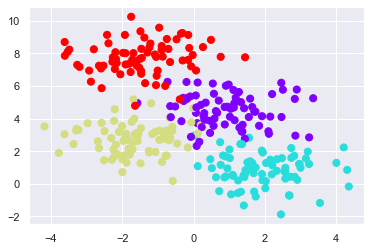

In [184]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [199]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier() 
dec_tree.fit(normalised_train_df, y_balanced)

In [200]:
#Utility function to visualize the output of classifier
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

In [197]:
 # Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)


NameError: name 'ax' is not defined

In [ ]:
ax.axis('tight')
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# FINAL ASSESSMENT

In [6]:
import numpy as np
import pandas as pd

In [7]:
DATA_SET =pd.read_csv('Data_for_UCI_named.csv')
DATA_SET

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [13]:
DATA_SET.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [14]:
DATA_SET.shape

(10000, 14)

In [20]:
DATA_SET.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [21]:
DATA_SET.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [22]:
DATA_SET.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object